**[作業目標]** <br />
使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵 <br />
觀察上述離散化特徵, 對於目標值的預測有沒有幫助 <br />
**[作業重點]** <br />
仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化 <br />
繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖 <br />

In [18]:
#importing modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
data_dir = './data/'

In [3]:
# Getting the dataset
f_app = os.path.join(data_dir,'application_train.csv')
df = pd.read_csv(f_app)
df.shape

(307511, 122)

In [6]:
# label encoding the data which only has two different value 
# So we can include these data while we are estimating correlation coef.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        if len(df[col].unique()) <= 2:
            df[col] = le.fit_transform(df[col])
print(df.shape)
df.head(5)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#We record an another column for abnormal value in DAYS_EMPLOYED and turn the weird values into nan(np.nan)
df['DAYS_EMPLOYED_WEIRD'] = df.DAYS_EMPLOYED == 365243
df.DAYS_EMPLOYED.replace(to_replace = 365243, value = np.nan, inplace = True)

#Taking absolute value of DAYS EMPLOYED 
df.DAYS_EMPLOYED = abs(df.DAYS_EMPLOYED)

In [11]:
correlationData = df.corr()['TARGET']
correlationData = correlationData.sort_values(ascending = False)
correlationData.head(10)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

In [13]:
print('correlation of DAYS EMPLOYED and TARGET: ', correlationData['DAYS_EMPLOYED'])

correlation of DAYS EMPLOYED and TARGET:  -0.07495845742555217


count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64


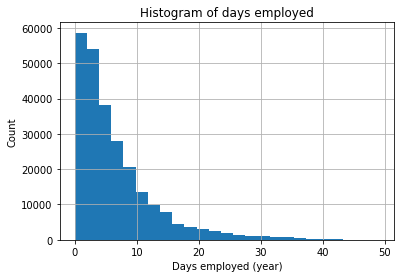

In [21]:
sub_df = df.loc[~df.DAYS_EMPLOYED.isnull()]
sub_df.DAYS_EMPLOYED =  sub_df.DAYS_EMPLOYED / (365)
print(sub_df.DAYS_EMPLOYED.describe())
sub_df.DAYS_EMPLOYED.hist(bins = 25)
plt.xlabel('Days employed (year)')
plt.ylabel('Count')
plt.title('Histogram of days employed')
plt.show()

In [23]:
sub_df['DAYS_EMPLOYED_GROUP'] = pd.qcut(sub_df.DAYS_EMPLOYED,5)
sub_df['DAYS_EMPLOYED_GROUP'].value_counts()

(-0.001, 1.69]      50511
(10.071, 49.074]    50428
(1.69, 3.425]       50409
(5.918, 10.071]     50399
(3.425, 5.918]      50390
Name: DAYS_EMPLOYED_GROUP, dtype: int64

**From the histogram of days employed, we can see that most of value concentrated below 20 yrs. So I decide to use qcut to discrete the data.**

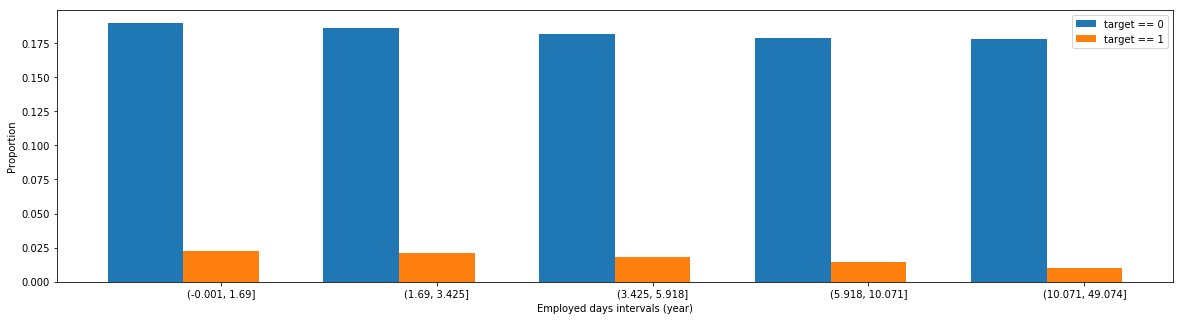

In [34]:
T1 = sub_df.loc[df.TARGET==1, 'DAYS_EMPLOYED_GROUP'].value_counts()
T1 = T1 / len(sub_df)
T0 = sub_df.loc[df.TARGET==0,'DAYS_EMPLOYED_GROUP'].value_counts()
T0 = T0 / len(sub_df)
intervals = sub_df.DAYS_EMPLOYED_GROUP.unique().sort_values()
n_group = len(intervals)
index = np.arange(n_group)

barWidth = 0.35

plt.figure(figsize=(20,5))
plt.bar(index, T0.values, barWidth, label = 'target == 0')
plt.bar(index+barWidth, T1.values, barWidth, label = 'target == 1')
plt.xlabel('Employed days intervals (year)')
plt.ylabel('Proportion')
plt.xticks(index+barWidth, np.array(intervals,dtype = str))
plt.legend()
plt.show()

**From above bar plot, maybe we can say that the repay ability is better when the clients have longer employed days?**

In [44]:
temp_df = sub_df.loc[sub_df.DAYS_EMPLOYED >= 40,'TARGET']
print('Number of clients with bad repay ability of days employed bigger than 40 years: ',np.sum(temp_df) )
print('Number of clients with good repay ability of days employed bigger than 40 years: ',len(temp_df) - np.sum(temp_df) )

Number of clients with bad repay ability of days employed bigger than 40 years:  1
Number of clients with good repay ability of days employed bigger than 40 years:  233


**From above result, we can tell that the repay ability of clients who have employed days bigger 40 years is good in this dataset. But this might cause overfitting. So I think discreted employ days is better for target predition.** 